In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import pandas as pd

In [15]:
colors = ["darkorange", "gold", "lawngreen", "lightseagreen"]
# cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
nodes = [0.0, 0.4, 0.8, 1.0]
cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

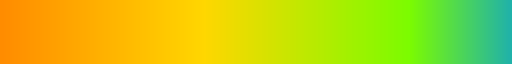

In [16]:
cmap2

In [17]:
colors = np.array([[15,99,225,255],
                   [171,221,164,255],
                   [255,255,191,255],
                   [253,174,97,255],
                   [226,66,47,255],
                   [252,122,228,255],
                   [183,106,237,255],
                   [108,0,176,255]])
colors = colors / 255
colors                   

array([[0.05882353, 0.38823529, 0.88235294, 1.        ],
       [0.67058824, 0.86666667, 0.64313725, 1.        ],
       [1.        , 1.        , 0.74901961, 1.        ],
       [0.99215686, 0.68235294, 0.38039216, 1.        ],
       [0.88627451, 0.25882353, 0.18431373, 1.        ],
       [0.98823529, 0.47843137, 0.89411765, 1.        ],
       [0.71764706, 0.41568627, 0.92941176, 1.        ],
       [0.42352941, 0.        , 0.69019608, 1.        ]])

In [18]:
nodes = np.array([0, 100, 250, 320, 400, 1000, 2000, 3000])/3000
nodes

array([0.        , 0.03333333, 0.08333333, 0.10666667, 0.13333333,
       0.33333333, 0.66666667, 1.        ])

In [19]:
cmap3 = LinearSegmentedColormap.from_list("mycmap2", list(zip(nodes, colors)))

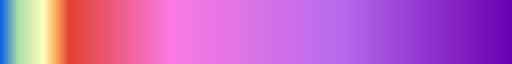

In [20]:
cmap3

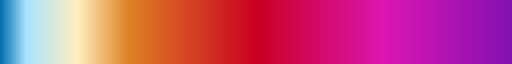

In [21]:
colors = np.array([[5,113,176,255],
                   [171,229,255,255],
                   [255,240,189,255],
                   [222,130,38,255],
                   [202,0,32,255],
                   [220,22,177,255],
                   [132,17,177,255]])
colors = colors / 255
nodes = (np.array([-500, -300, 100, 500, 1500, 2500, 3500]) + 500) / 4000
cmap4 = LinearSegmentedColormap.from_list("mycmap4", list(zip(nodes, colors)))
cmap4

In [2]:
df = pd.read_pickle('tmp.p')
df

,$\frac{P_e}{\ell}$ (1/m),$J_0$ (m/yr),Speed diff,Class
0,0.000021,-915.378881,3029.186179,unstable
1,0.000306,-200.805053,511.123464,unstable
2,-0.000047,-82.857761,456.284207,unstable
3,-0.000034,-450.936824,-435.655180,unstable
4,0.000078,-1243.208582,-349.572187,unstable
...,...,...,...,...
99,0.000234,-112.716518,613.747370,unstable
100,0.000044,-167.859915,1023.168837,unstable
101,0.000054,-1081.388452,2774.927415,unstable
102,0.000315,5.479272,467.138448,unstable


In [11]:
np.sum(np.abs(df['Speed diff']) >= 300)

54

array([[<AxesSubplot:title={'center':'Speed diff'}>]], dtype=object)

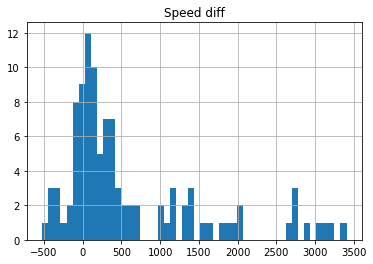

In [23]:
df.hist(column='Speed diff', bins=50)

In [24]:
newclass = []
count = 0
for idx, row in df.iterrows():
    if row['Speed diff'] >= 300 or row['Speed diff'] <= -300:
        newclass.append(r'$|\Delta V| \geq$ 300 m/yr')
        count += 1
    else:
        newclass.append(r'$|\Delta V| <$ 300 m/yr')

df['Legend'] = newclass
print(count)

54


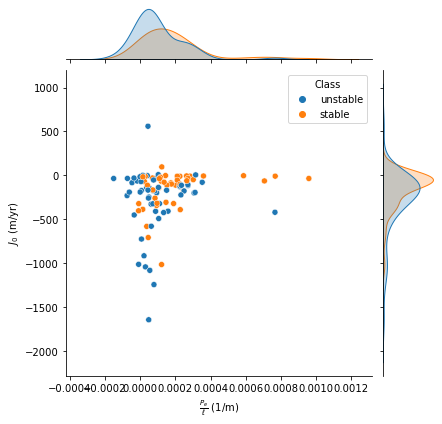

In [25]:
aa = sns.jointplot(data=df, x=r'$\frac{P_e}{\ell}$ (1/m)', y=r'$J_0$ (m/yr)', hue="Class")

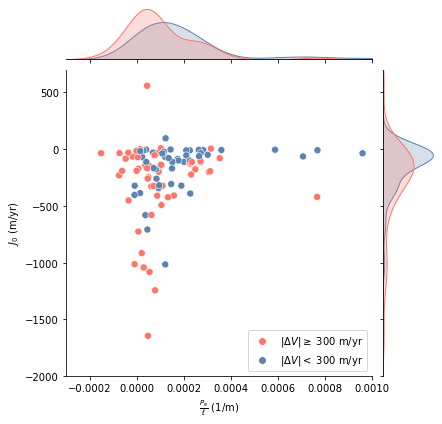

In [26]:
# testcmap = cm.get_cmap('Spectral')
testcmap = {r'$|\Delta V| \geq$ 300 m/yr': '#FC766A', r'$|\Delta V| <$ 300 m/yr': '#5B84B1'}
aa = sns.jointplot(data=df, x=r'$\frac{P_e}{\ell}$ (1/m)', y=r'$J_0$ (m/yr)', hue="Legend", palette=testcmap, joint_kws={"s": 50})
aa.ax_joint.set_xlim([-0.0003, 0.0010])
aa.ax_joint.set_ylim([-2000, 700])
aa.ax_joint.legend(loc='lower right')
# aa.ax_joint.set_xticks(np.linspace(-0.0002, 0.0010, 7))
aa.savefig('Fig3a.png')

In [27]:
aa.ax_joint.set_xlabel('test')

Text(0.5, 26.785000000000004, 'test')